### Get precision and recall for the task performance

In [31]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def read_and_clean_txt(file_path):
    # Read the file
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    # Parse the lines to create a list of lists
    data = [ast.literal_eval(line.strip()) for line in lines]
    
    # Define column names
    column_names = ['Precision4genCQ', 'Recall4genCQ', 'Precision4expertCQ', 'Recall4expertCQ']

    # Convert the list of lists to a DataFrame
    df = pd.DataFrame(data, columns=column_names)
    
    return df

def get_precision(foler_path):
    temp = [0.5, 0.75, 1.0, 1.25, 1.5]
    rag_file_count = [0,1,2,3,4,5,10]
    Precision_set = [] #[P_temp1, P_temp2,...P_temp5]
    for i_count in rag_file_count:
        # for each temp
        P_temp = []
        for i_temp in temp:
            file = f'{foler_path}/metric_results/rag-file-count-{i_count}-gpt-4o-temp-{i_temp}.txt'
            df = read_and_clean_txt(file)
            # get average P1,R1,P2,R2 for each temperature
            averages = df.mean()  
            # get average P1 for each temperature      
            P_temp.append(averages[0])
        # print(f'Average Precision for rag file count({i_count}) with 5 different temperature for 10 interation:\n{P_temp}')
        P_count = sum(P_temp)/len(P_temp)
        # print(f'Average Precision for rag file count({i_count}):\n{P_count}')
        # get average precision for each rag file count
        Precision_set.append(P_count)
    return Precision_set

def get_recall(foler_path):
    temp = [0.5, 0.75, 1.0, 1.25, 1.5]
    rag_file_count = [0,1,2,3,4,5,10]
    Recall_set = [] 
    for i_count in rag_file_count:
        # for each temp
        R_temp = []
        for i_temp in temp:
            file = f'{foler_path}/metric_results/rag-file-count-{i_count}-gpt-4o-temp-{i_temp}.txt'
            df = read_and_clean_txt(file)
            # get average P1,R1,P2,R2 for each temperature
            averages = df.mean()  
            # get average P1 for each temperature      
            R_temp.append(averages[1])
        # print(f'Average Recall for rag file count({i_count}) with 5 different temperature for 10 interation:\n{R_temp}')
        R_count = sum(R_temp)/len(R_temp)
        # print(f'Average Recall for rag file count({i_count}):\n{R_count}')
        # get average recall for each rag file count
        Recall_set.append(R_count)
    return Recall_set

def plotting(metric_hci, metric_re, metric_name):
    n_papers = ['Zero-shot', '1', '2', '3', '4', '5', '10']
    # The x locations for the groups
    ind = np.arange(len(n_papers))

    # The width of the bars
    width = 0.35

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plotting precision bars for all sets
    rects1 = ax.bar(ind - width/2, metric_hci, width, label='HCI')
    rects2 = ax.bar(ind + width/2, metric_re, width, label='RE')

    # Adding title and labels
    # ax.set_title('Precision with different number of papers for the knowledge base in RAG')
    ax.set_xlabel('N_paper')
    ax.set_ylabel(metric_name)
    ax.set_xticks(ind)
    ax.set_xticklabels(n_papers)

    # Adding a single bar where N_paper equals 1
    single_bar_value = 0.36701298701298696  # The precision value for the single bar
    single_bar_label = 'RE with the visionary paper'
    single_bar_position = 1  # Position for N_paper = 1

    # Plotting the single bar
    ax.bar(single_bar_position, single_bar_value, 0.25, color='green', label=single_bar_label)

    # Adding legend
    ax.legend()

    # Adding y-axis labels
    ax.yaxis.set_ticks(np.arange(0, 1, 0.1))

    # Save the figure as PNG
    plt.savefig(f'{metric_name}-twobars.png', dpi=300, bbox_inches='tight')

    # Displaying the plot
    plt.show()

def plotting4threebars(metric_hci, metric_re,metric_re1,metric_name):
    n_papers = ['Zero-shot', '1', '2', '3', '4', '5', '10']
    # The x locations for the groups
    ind = np.arange(len(n_papers))

    # The width of the bars
    width = 0.25

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plotting precision bars for all sets
    rects1 = ax.bar(ind - width, metric_hci, width, label='HCI')
    rects2 = ax.bar(ind, metric_re, width, label='RE')
    rects3 = ax.bar(ind + width, metric_re1, width, label='RE with the visionary paper')

    # Adding title and labels
    # ax.set_title('Precision with different number of papers for the knowledge base in RAG')
    ax.set_xlabel('N_paper')
    ax.set_ylabel(metric_name)
    ax.set_xticks(ind)
    ax.set_xticklabels(n_papers)

    # Adding legend
    ax.legend()

    # Adding y-axis labels
    ax.yaxis.set_ticks(np.arange(0, 1, 0.1))

    # Save the figure as PNG
    plt.savefig(f'{metric_name}-threebars.png', dpi=300, bbox_inches='tight')

    # Displaying the plot
    plt.show()

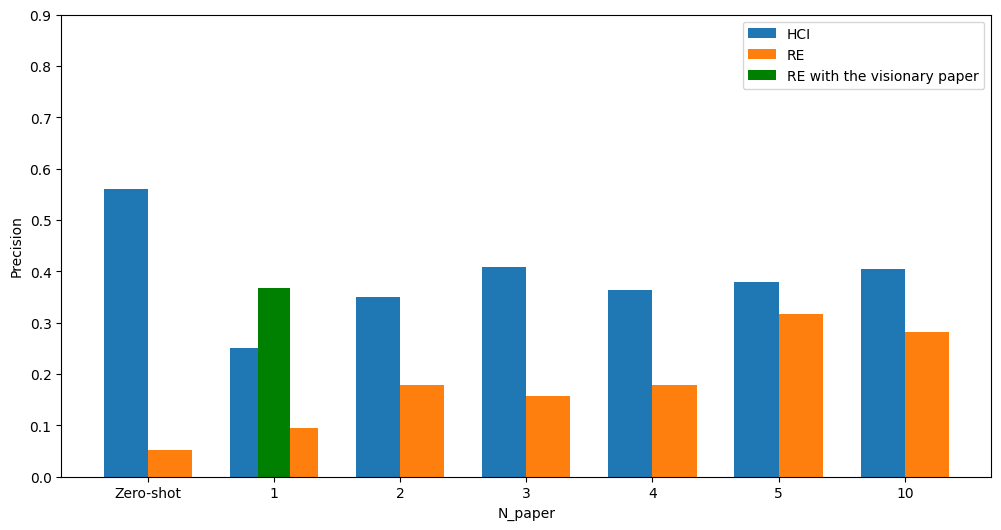

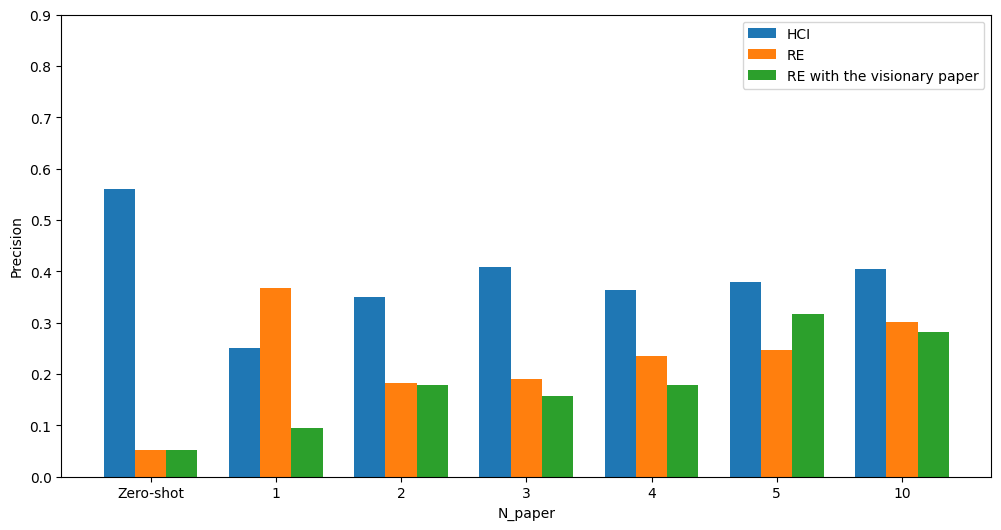

In [32]:
precision_hci = get_precision('hci')
precision_re =  get_precision('re')
precision_re1 =  get_precision('re1')
plotting(precision_hci, precision_re1, 'Precision')
plotting4threebars(precision_hci, precision_re,precision_re1, 'Precision')

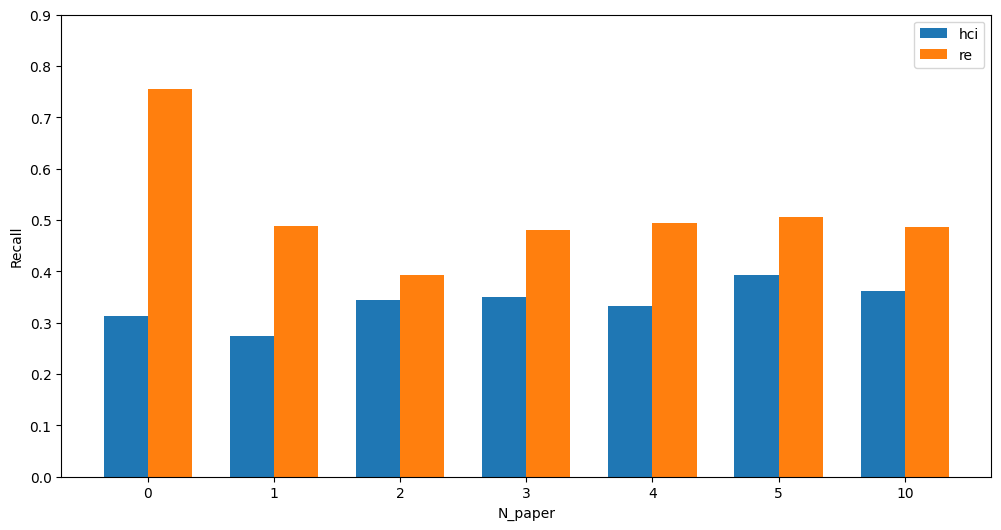

In [22]:
recall_hci = get_recall('hci')
recall_re = get_recall('re')
plotting(recall_hci, recall_re, 'Recall')

### Get consistency of different temperature of LLMs

In [28]:
def read_and_clean_txt(file_path):
    # Read the file
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    # Parse the lines to create a list of lists
    data = [ast.literal_eval(line.strip()) for line in lines]
    
    # Define column names
    column_names = ['Precision4genCQ', 'Recall4genCQ', 'Precision4expertCQ', 'Recall4expertCQ']

    # Convert the list of lists to a DataFrame
    df = pd.DataFrame(data, columns=column_names)
    
    return df

def get_std_temp(foler_path):
    temp = [0.5, 0.75, 1.0, 1.25, 1.5]
    rag_file_count = [0,1,2,3,4,5,10]
    std_set = [] 
    for i_temp in temp:
        std_count = []
        for i_count in rag_file_count:
            file = f'{foler_path}/metric_results/rag-file-count-{i_count}-gpt-4o-temp-{i_temp}.txt'
            df = read_and_clean_txt(file)
            df_P = df['Precision4genCQ'] 
            # get standard deviation of 10 iteration for each temperature and each n_paper
            std = df_P.std()  
            std_count.append(std)
        print(f'Standard deviation for temperature({i_temp}):\n{std_count}')
        # get average standard deviation for each count
        std_count = sum(std_count)/len(std_count)
        print(f'Average std for each n_paper at ({i_temp}):\n{std_count}')
        # get average std for each temperature
        std_set.append(std_count)
    return std_set

def plotting(metric_hci, metric_re, metric_name):
    temperatues = ['0.5', '0.75', '1.0', '1.25', '1.5']
    # The x locations for the groups
    ind = np.arange(len(temperatues))

    # The width of the bars
    width = 0.35

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plotting precision bars for all sets
    rects1 = ax.bar(ind - width/2, metric_hci, width, label='hci')
    rects2 = ax.bar(ind + width/2, metric_re, width, label='re')

    # Adding title and labels
    # ax.set_title('Precision with different number of papers for the knowledge base in RAG')
    ax.set_xlabel('Temperature')
    ax.set_ylabel(metric_name)
    ax.set_xticks(ind)
    ax.set_xticklabels(temperatues)

    # Adding legend
    ax.legend()

    # Adding y-axis labels
    ax.yaxis.set_ticks(np.arange(0, 1, 0.1))

    # Save the figure as PNG
    plt.savefig(f'{metric_name}_temperatue.png', dpi=300, bbox_inches='tight')

    # Displaying the plot
    plt.show()

Average Precision for temperature(0.5):
[0.5266666666666666, 0.18000000000000002, 0.4533333333333333, 0.3466666666666667, 0.2666666666666667, 0.32666666666666666, 0.5333333333333333]
Average Precision for temperature at (0.5):
0.3761904761904762
Average Precision for temperature(0.75):
[0.5666666666666667, 0.2866666666666667, 0.37333333333333335, 0.4, 0.32666666666666666, 0.4, 0.44000000000000006]
Average Precision for temperature at (0.75):
0.399047619047619
Average Precision for temperature(1.0):
[0.6133333333333334, 0.30666666666666664, 0.47333333333333333, 0.3666666666666667, 0.4333333333333333, 0.3466666666666667, 0.33333333333333337]
Average Precision for temperature at (1.0):
0.4104761904761905
Average Precision for temperature(1.25):
[0.5133333333333334, 0.3, 0.18666666666666665, 0.4066666666666666, 0.41999999999999993, 0.42000000000000004, 0.32666666666666666]
Average Precision for temperature at (1.25):
0.3676190476190476
Average Precision for temperature(1.5):
[0.58666666666

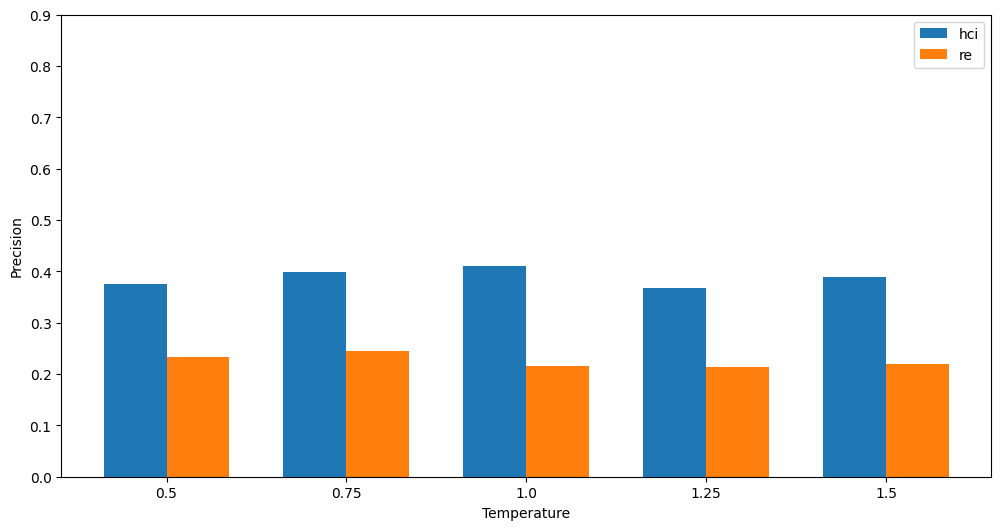

In [29]:
precision_hci = get_precision_temp('hci')
precision_re = get_precision_temp('re')
plotting(precision_hci, precision_re, 'Precision')